In [3]:
import re
import pandas as pd
import os
import csv
import numpy as np
import matplotlib.pyplot as plt

In [7]:
beers_csv = "beers.csv"
breweries_csv = "breweries.csv"

beers_df = pd.read_csv(beers_csv)
breweries_df = pd.read_csv(breweries_csv)
beers_df.head()

,Unnamed: 0,abv,ibu,id,name,style,brewery_id,ounces
0,0,0.050,NaN,1436,Pub Beer,American Pale Lager,408,12.0
1,1,0.066,NaN,2265,Devil's Cup,American Pale Ale (APA),177,12.0
2,2,0.071,NaN,2264,Rise of the Phoenix,American IPA,177,12.0
3,3,0.090,NaN,2263,Sinister,American Double / Imperial IPA,177,12.0
4,4,0.075,NaN,2262,Sex and Candy,American IPA,177,12.0


In [8]:
breweries_df = breweries_df.rename(columns={"Unnamed: 0":"brewery_id"})
breweries_df

,brewery_id,name,city,state
0,0,NorthGate Brewing,Minneapolis,MN
1,1,Against the Grain Brewery,Louisville,KY
2,2,Jack's Abby Craft Lagers,Framingham,MA
3,3,Mike Hess Brewing Company,San Diego,CA
4,4,Fort Point Beer Company,San Francisco,CA
...,...,...,...,...
553,553,Covington Brewhouse,Covington,LA
554,554,Dave's Brewfarm,Wilson,WI
555,555,Ukiah Brewing Company,Ukiah,CA
556,556,Butternuts Beer and Ale,Garrattsville,NY


In [9]:
# pd.merge(beers_df, breweries_df, )
poop_df = breweries_df.merge(beers_df, on="brewery_id")
poop_df

,brewery_id,name_x,city,state,Unnamed: 0,abv,ibu,id,name_y,style,ounces
0,0,NorthGate Brewing,Minneapolis,MN,1493,0.045,50.0,2692,Get Together,American IPA,16.0
1,0,NorthGate Brewing,Minneapolis,MN,1494,0.049,26.0,2691,Maggie's Leap,Milk / Sweet Stout,16.0
2,0,NorthGate Brewing,Minneapolis,MN,1495,0.048,19.0,2690,Wall's End,English Brown Ale,16.0
3,0,NorthGate Brewing,Minneapolis,MN,1496,0.060,38.0,2689,Pumpion,Pumpkin Ale,16.0
4,0,NorthGate Brewing,Minneapolis,MN,1497,0.060,25.0,2688,Stronghold,American Porter,16.0
...,...,...,...,...,...,...,...,...,...,...,...
2405,556,Butternuts Beer and Ale,Garrattsville,NY,488,0.049,NaN,52,Heinnieweisse Weissebier,Hefeweizen,12.0
2406,556,Butternuts Beer and Ale,Garrattsville,NY,489,0.068,NaN,51,Snapperhead IPA,American IPA,12.0
2407,556,Butternuts Beer and Ale,Garrattsville,NY,490,0.049,NaN,50,Moo Thunder Stout,Milk / Sweet Stout,12.0
2408,556,Butternuts Beer and Ale,Garrattsville,NY,491,0.043,NaN,49,Porkslap Pale Ale,American Pale Ale (APA),12.0


In [10]:
beers_and_breweries = pd.merge(beers_df, 
                               breweries_df, 
                               how='inner', 
                               left_on="brewery_id", 
                               right_on="id", 
                               sort=True,
                               suffixes=('_beer', '_brewery'))

KeyError: 'id'

In [11]:
beers.dtypes

NameError: name 'beers' is not defined

In [ ]:
def get_var_category(series):
    unique_count = series.nunique(dropna=False)
    total_count = len(series)
    if pd.api.types.is_numeric_dtype(series):
        return 'Numerical'
    elif pd.api.types.is_datetime64_dtype(series):
        return 'Date'
    elif unique_count==total_count:
        return 'Text (Unique)'
    else:
        return 'Categorical'

def print_categories(df):
    for column_name in df.columns:
        print(column_name, ": ", get_var_category(df[column_name]))

In [12]:
print_categories(beers)

NameError: name 'print_categories' is not defined

In [58]:
brew_group = poop_df.groupby('style')

In [60]:
count_brew = brew_group['style'].count()

count_brew

style
0                             5
Abbey Single Ale              2
Altbier                      13
American Adjunct Lager       18
American Amber / Red Ale    133
                           ... 
Tripel                       11
Vienna Lager                 20
Wheat Ale                     1
Winter Warmer                15
Witbier                      51
Name: style, Length: 100, dtype: int64

In [61]:
count_brew.describe()

count    100.000000
mean      24.100000
std       52.288535
min        1.000000
25%        3.000000
50%        9.000000
75%       20.750000
max      424.000000
Name: style, dtype: float64

In [45]:
state_data = poop_df["state"].value_counts()
style_data = poop_df["style"].value_counts()

In [46]:
style_state_data= state_data.add(style_data, fill_value=0)

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

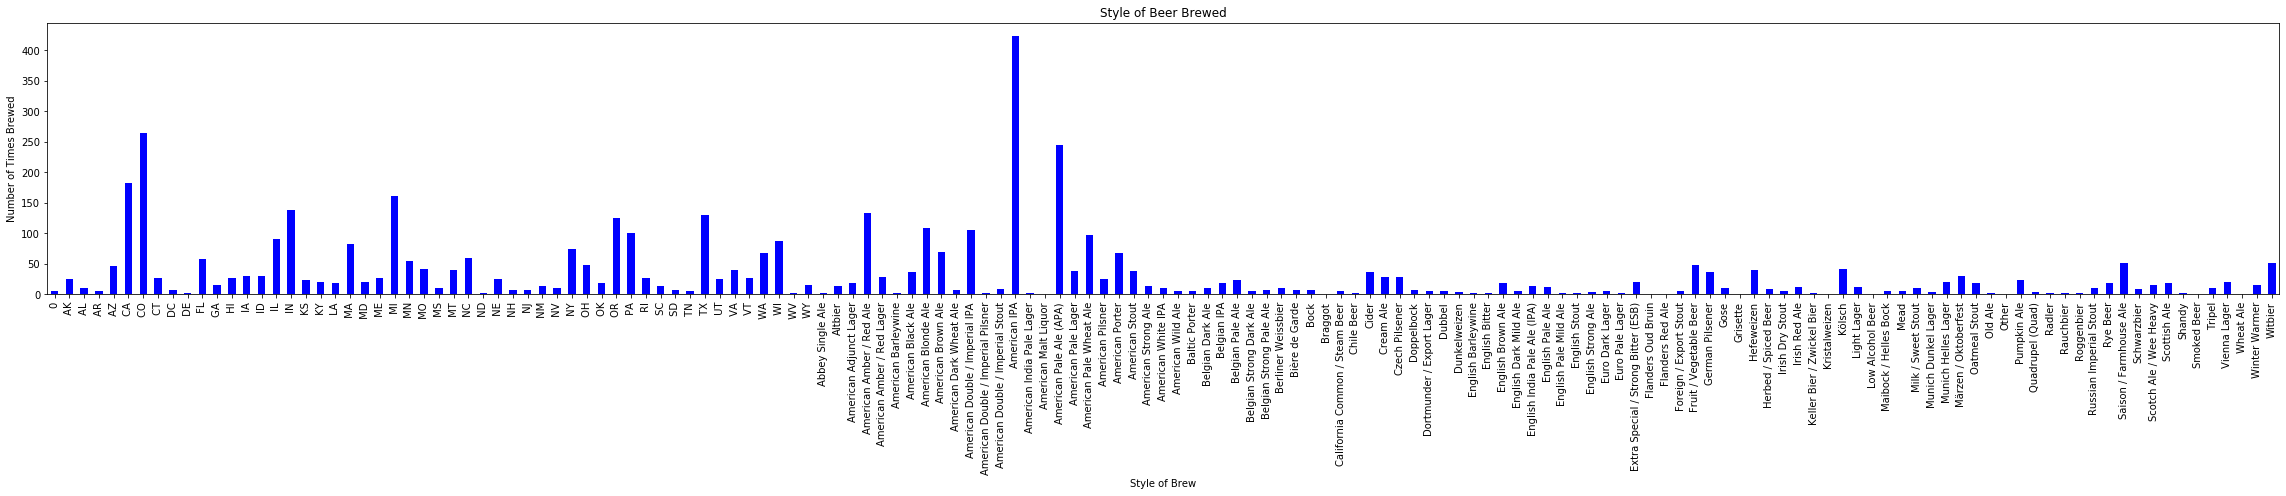

In [66]:
style_state_data.plot(kind="bar", facecolor="blue", figsize=(40,5))
plt.title("Style of Beer Brewed")
plt.ylabel("Number of Times Brewed")
plt.xlabel("Style of Brew")
plt.show
plt.tight_layout

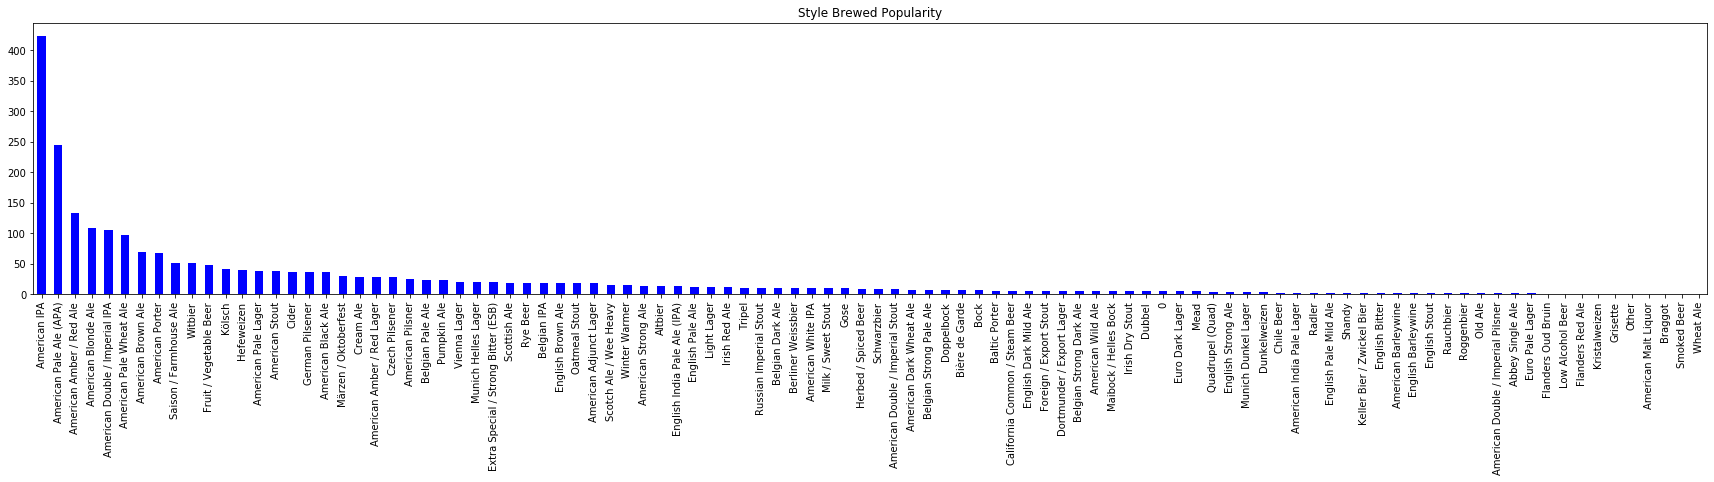

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [78]:
style_chart = style_data.plot(kind='bar', facecolor="blue", figsize=(30,5))
plt.title("Style Brewed Popularity")
state_chart.set_xlabel("Style")
state_chart.set_ylabel("Number of Times Brewed")
plt.show()
plt.tight_layout

In [67]:
state_group = poop_df.groupby('state')

In [68]:
state_group.count()

,brewery_id,name_x,city,Unnamed: 0,abv,ibu,id,name_y,style,ounces
state,,,,,,,,,,
AK,25,25,25,25,25,25,25,25,25,25
AL,10,10,10,10,10,10,10,10,10,10
AR,5,5,5,5,5,5,5,5,5,5
AZ,47,47,47,47,47,47,47,47,47,47
CA,183,183,183,183,183,183,183,183,183,183
CO,265,265,265,265,265,265,265,265,265,265
CT,27,27,27,27,27,27,27,27,27,27
DC,8,8,8,8,8,8,8,8,8,8
DE,2,2,2,2,2,2,2,2,2,2


C:\Users\dowen\anaconda3\lib\site-packages\pandas\plotting\_matplotlib\core.py:320: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = self.plt.figure(figsize=self.figsize)


AttributeError: 'Series' object has no attribute 'set_xlabel'

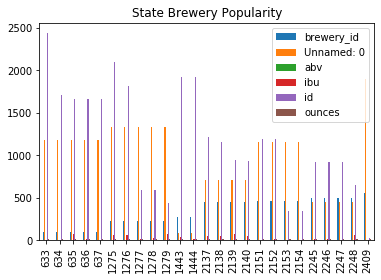

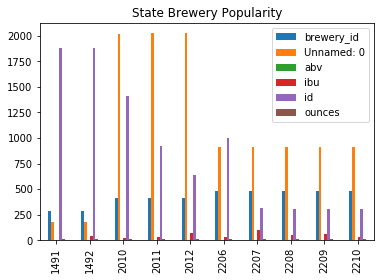

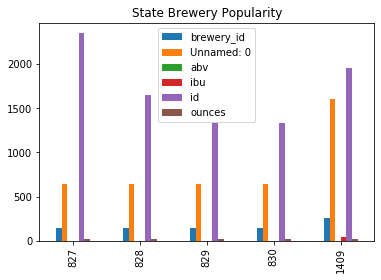

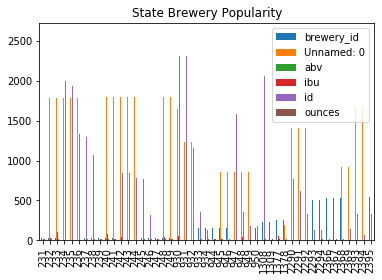

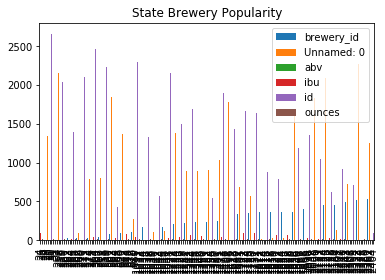

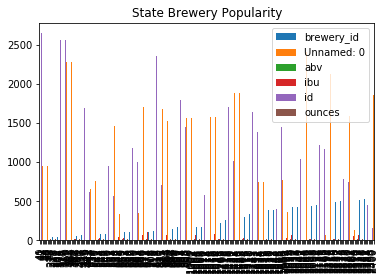

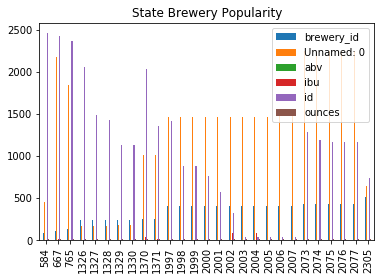

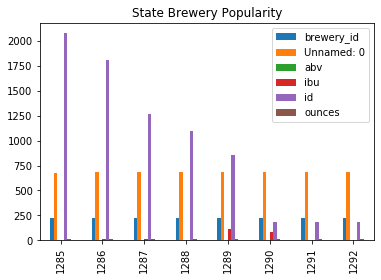

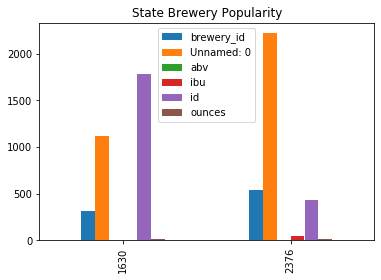

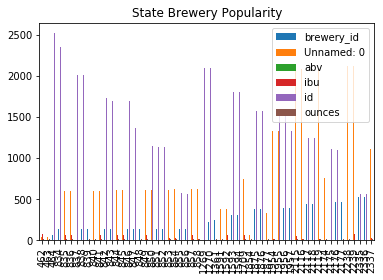

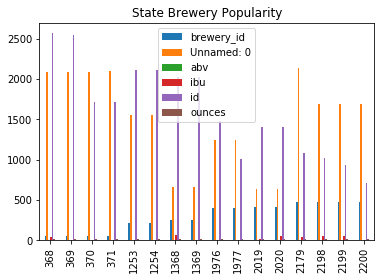

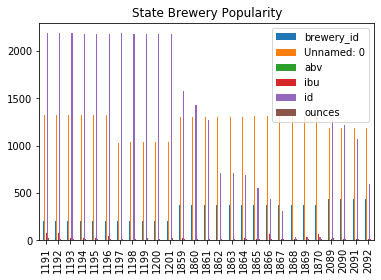

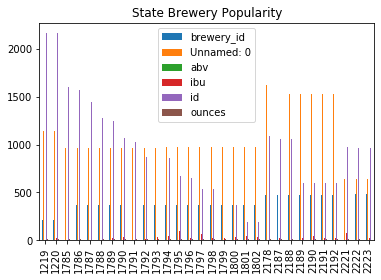

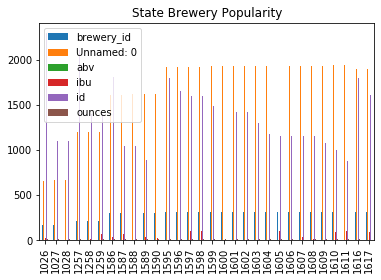

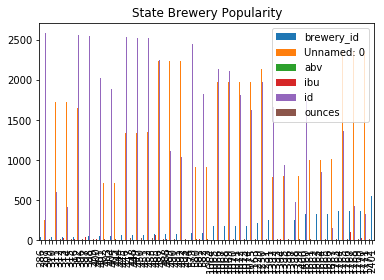

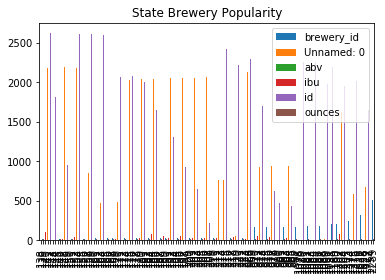

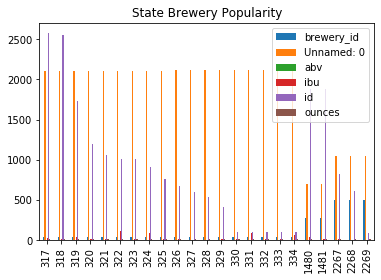

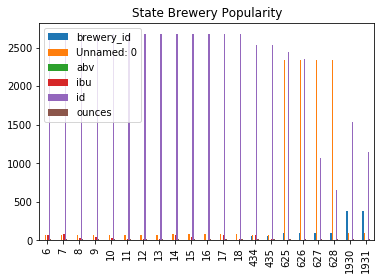

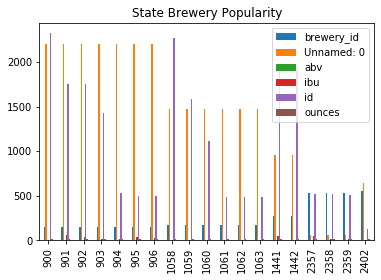

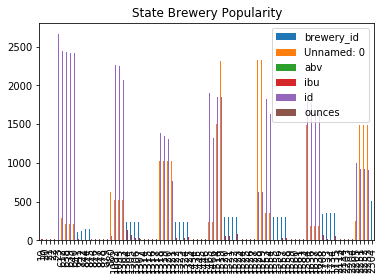

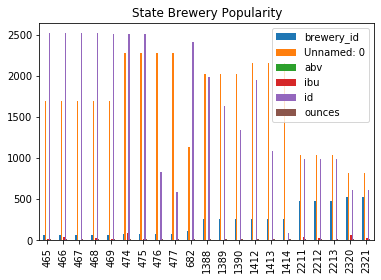

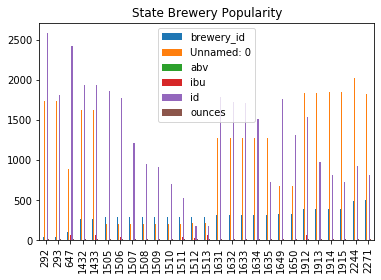

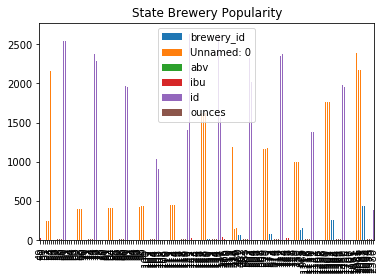

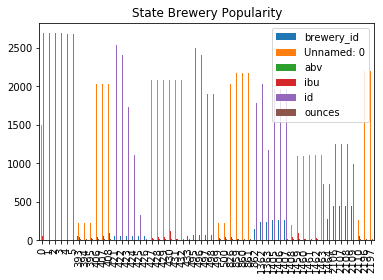

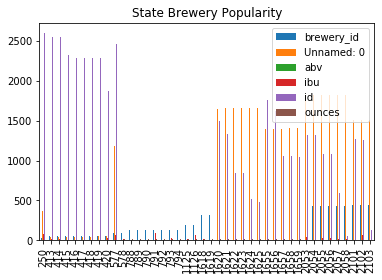

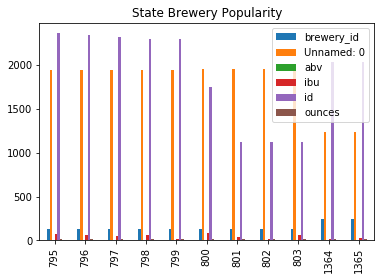

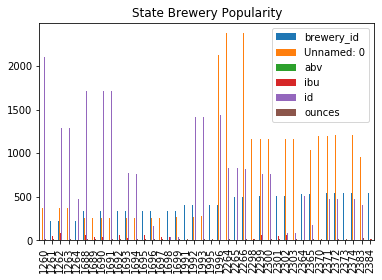

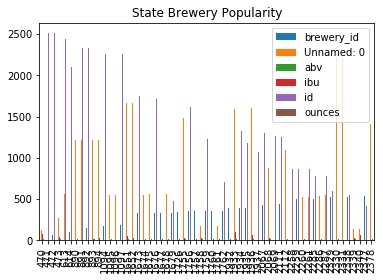

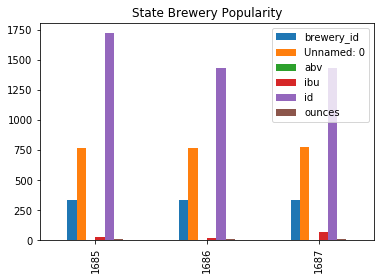

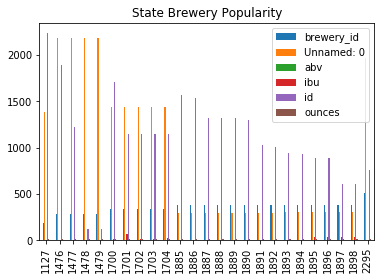

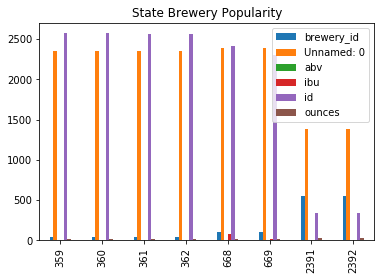

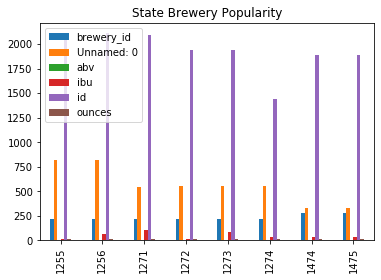

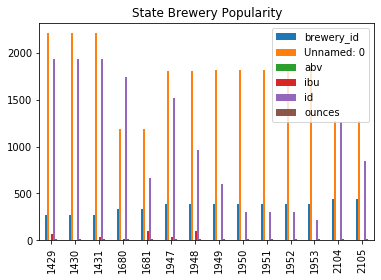

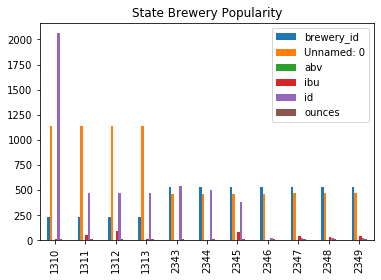

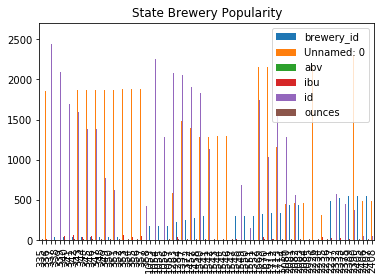

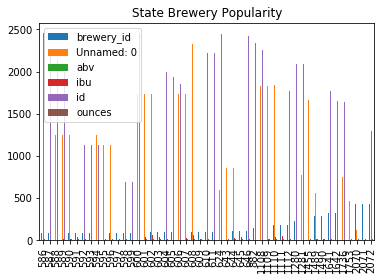

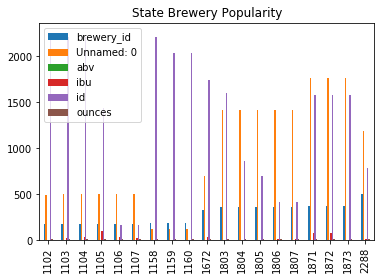

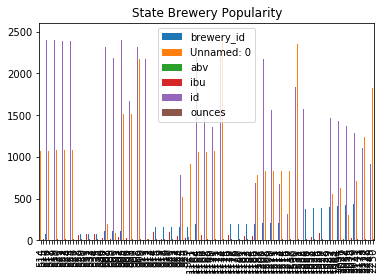

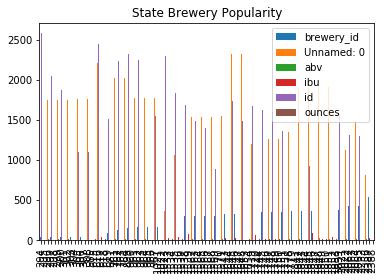

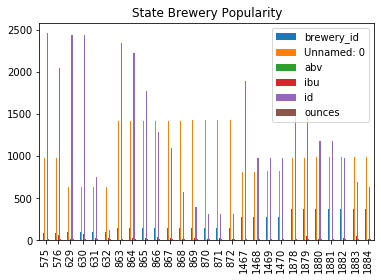

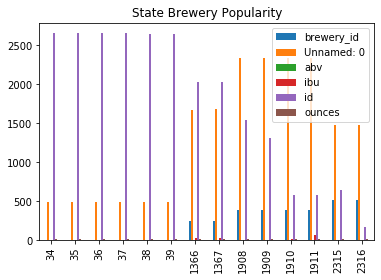

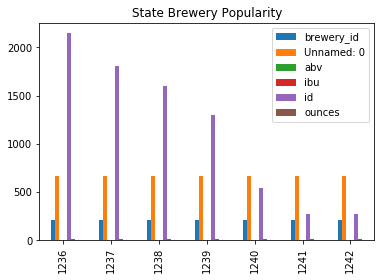

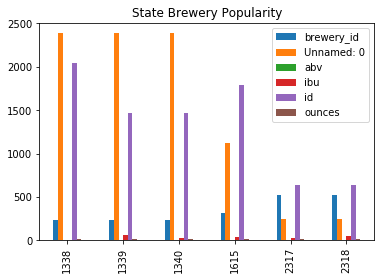

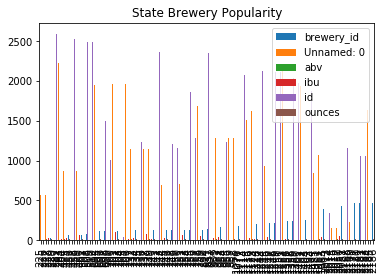

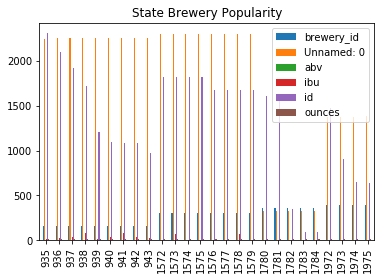

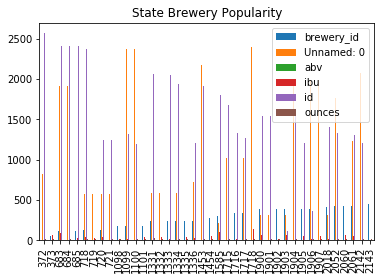

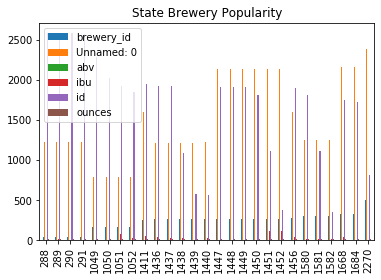

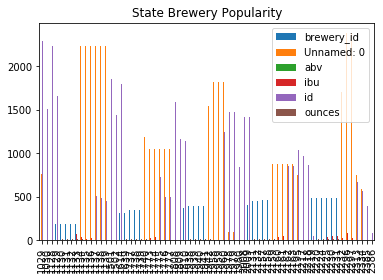

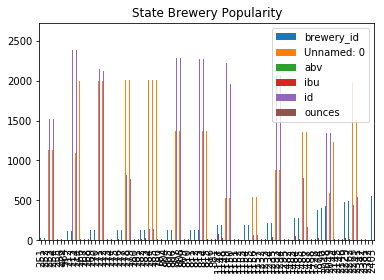

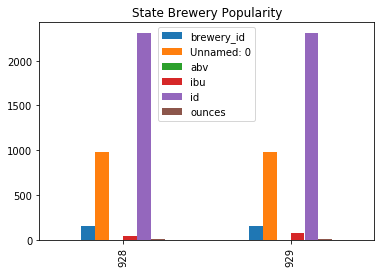

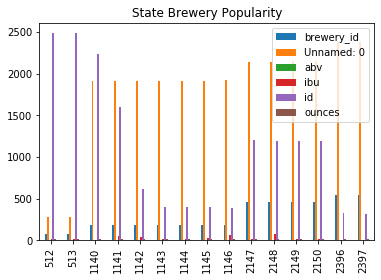

In [70]:
state_chart = state_group.plot(kind="bar", title="State Brewery Popularity")
state_chart.set_xlabel("state")
state_chart.set_ylabel("Number of Breweries")
plt.show()

In [71]:
state_data = poop_df["state"].value_counts()

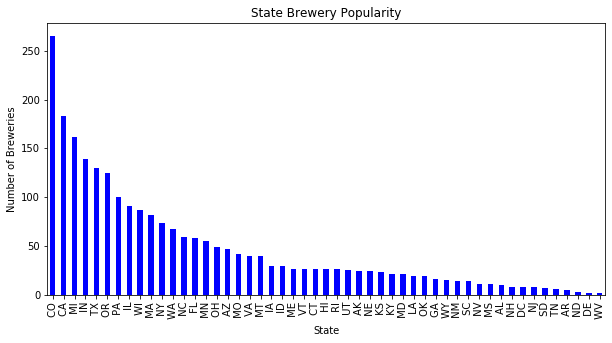

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [76]:
state_chart = state_data.plot(kind='bar', facecolor="blue", figsize=(10,5))
plt.title("State Brewery Popularity")
state_chart.set_xlabel("State")
state_chart.set_ylabel("Number of Breweries")
plt.show()
plt.tight_layout

In [127]:
beer_group.df = poop_df.groupby(['state', 'style'])

In [128]:
beer_sum = beer_group.df.sum()
beer_sum.head()

brewery_id  Unnamed: 0    abv    ibu    id  \
state style                                                                  
 AK   Altbier                          270          89  0.053   18.0  1920   
      American Amber / Red Ale         595        1627  0.101   15.0  3357   
      American Blonde Ale             1013        3043  0.155   61.0  4011   
      American Brown Ale               223        1333  0.050   24.0   586   
      American IPA                    2175        7494  0.437  397.0  7952   

                                ounces  
state style                             
 AK   Altbier                     12.0  
      American Amber / Red Ale    24.0  
      American Blonde Ale         36.0  
      American Brown Ale          12.0  
      American IPA                84.0

In [134]:
state_and_style = poop_df[["state","style"]]
state_and_style = state_and_style.set_index("state")
state_and_style

,style
state,
MN,American IPA
MN,Milk / Sweet Stout
MN,English Brown Ale
MN,Pumpkin Ale
MN,American Porter
...,...
NY,Hefeweizen
NY,American IPA
NY,Milk / Sweet Stout


In [136]:
state_and_style_df = pd.DataFrame(state_and_style)

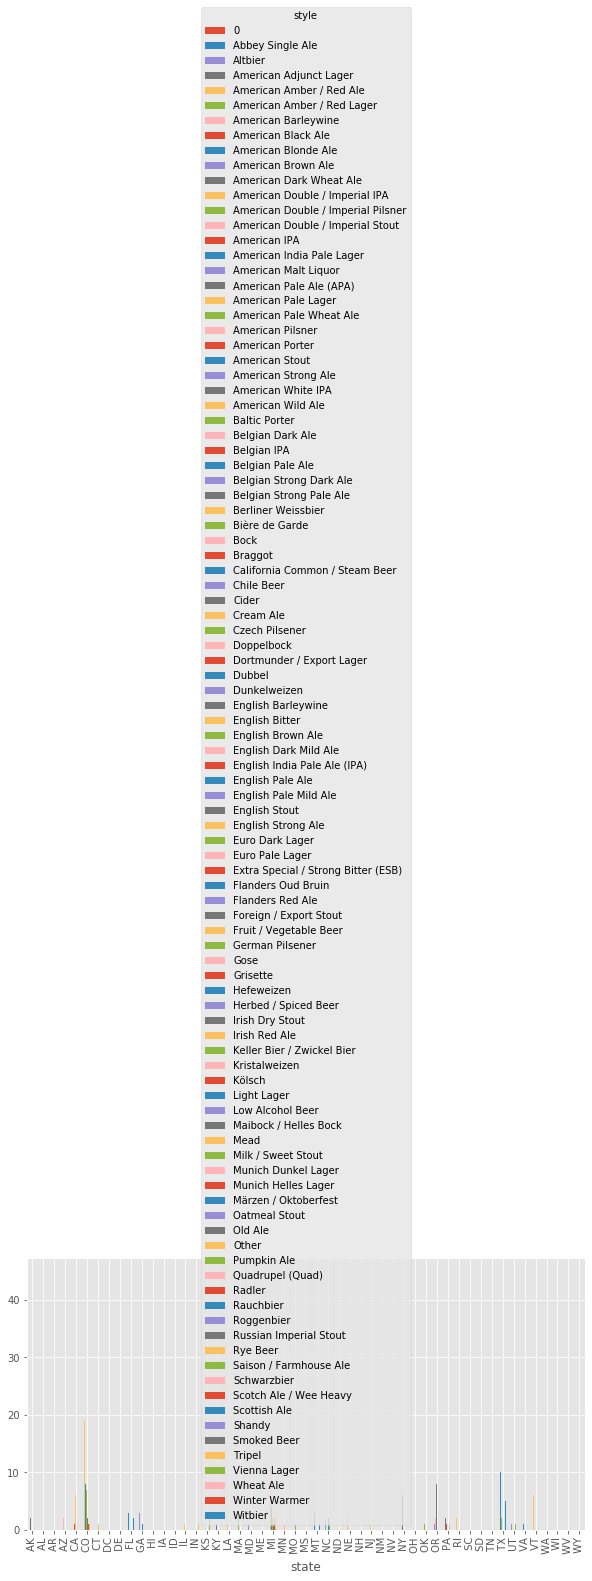

In [141]:
plt.style.use('ggplot')

state_and_style_df.groupby(['state', 'style'])\
      .style.count().unstack().plot.bar(legend=True, figsize=(10,5))

In [130]:
state_and_style.groupby('state').count()

,style
state,
AK,25
AL,10
AR,5
AZ,47
CA,183
CO,265
CT,27
DC,8
DE,2


In [121]:
state_and_style.plot(kind="bar", figsize=(20,3))
state_and_style.set_xticklabels(poop_df["state"], rotation=45)
plt.show
plt.tight_layout

TypeError: no numeric data to plot